# FINITE DIFFERENCE METHOD FOR TWO-DIMENSION NAVIER STOKES EQUATION
 elevation mountain data extracted form usgs.gov

In [0]:
!pip install -U -q PyDrive
 
from pydrive.auth import GoogleAuth
from pydrive.drive import GoogleDrive
from google.colab import auth
from oauth2client.client import GoogleCredentials
 
# 1. Authenticate and create the PyDrive client.
auth.authenticate_user()
gauth = GoogleAuth()
gauth.credentials = GoogleCredentials.get_application_default()
drive = GoogleDrive(gauth)

Mounting data set from google drive 

In [5]:
from google.colab import drive
drive.mount('/content/gdrive')

Go to this URL in a browser: https://accounts.google.com/o/oauth2/auth?client_id=947318989803-6bn6qk8qdgf4n4g3pfee6491hc0brc4i.apps.googleusercontent.com&redirect_uri=urn%3aietf%3awg%3aoauth%3a2.0%3aoob&response_type=code&scope=email%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdocs.test%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdrive%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdrive.photos.readonly%20https%3a%2f%2fwww.googleapis.com%2fauth%2fpeopleapi.readonly

Enter your authorization code:
··········
Mounted at /content/gdrive


RUNNIG = 0.0 %
RUNNIG = 2.0 %
RUNNIG = 4.0 %
RUNNIG = 6.0 %
RUNNIG = 8.0 %
RUNNIG = 10.0 %
RUNNIG = 12.0 %
RUNNIG = 14.0 %
RUNNIG = 16.0 %
RUNNIG = 18.0 %
RUNNIG = 20.0 %
RUNNIG = 22.0 %
RUNNIG = 24.0 %
RUNNIG = 26.0 %
RUNNIG = 28.0 %
RUNNIG = 30.0 %
RUNNIG = 32.0 %
---------------> Profile 1 saved
RUNNIG = 34.0 %
RUNNIG = 36.0 %
RUNNIG = 38.0 %
RUNNIG = 40.0 %
RUNNIG = 42.0 %
RUNNIG = 44.0 %
RUNNIG = 46.0 %
RUNNIG = 48.0 %
RUNNIG = 50.0 %
RUNNIG = 52.0 %
RUNNIG = 54.0 %
RUNNIG = 56.0 %
RUNNIG = 58.0 %
RUNNIG = 60.0 %
RUNNIG = 62.0 %
RUNNIG = 64.0 %
RUNNIG = 66.0 %
---------------> Profile 2 saved
RUNNIG = 68.0 %
RUNNIG = 70.0 %
RUNNIG = 72.0 %
RUNNIG = 74.0 %
RUNNIG = 76.0 %
RUNNIG = 78.0 %
RUNNIG = 80.0 %
RUNNIG = 82.0 %
RUNNIG = 84.0 %
RUNNIG = 86.0 %
RUNNIG = 88.0 %
RUNNIG = 90.0 %
RUNNIG = 92.0 %
RUNNIG = 94.0 %
RUNNIG = 96.0 %
RUNNIG = 98.0 %
RUNNIG = 100.0 %
---------------> Profile 3 saved


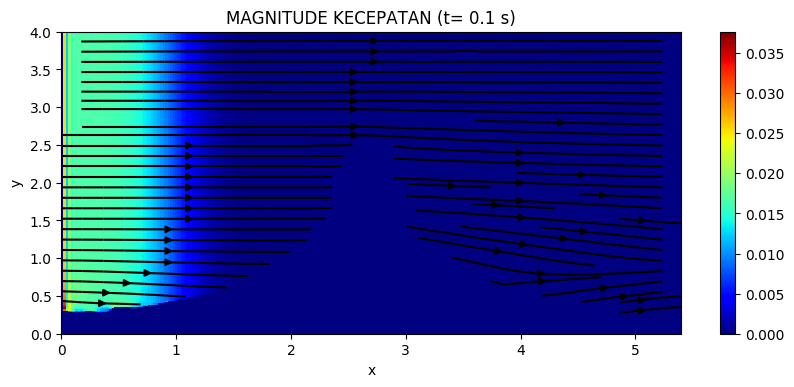

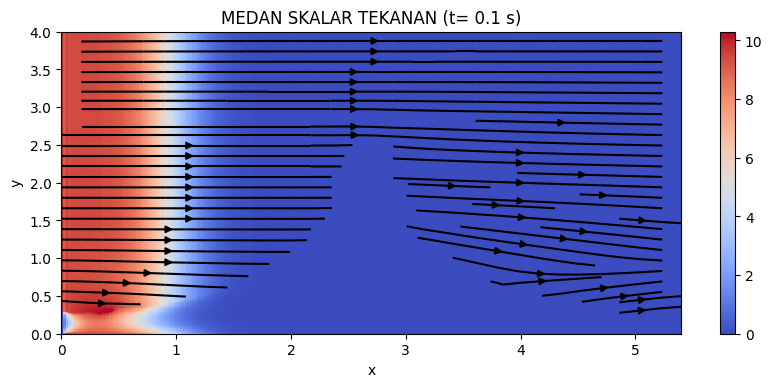

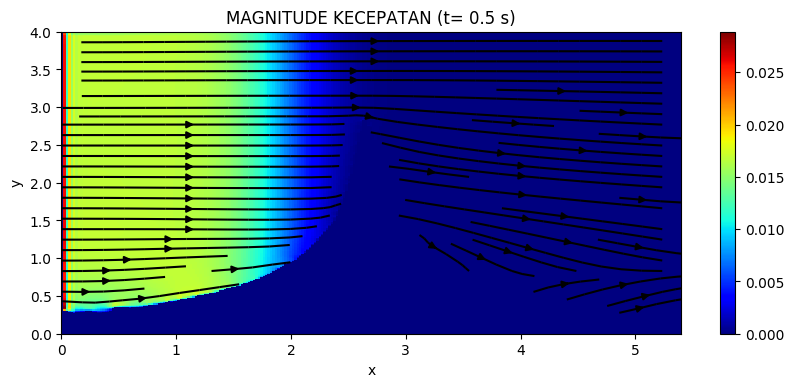

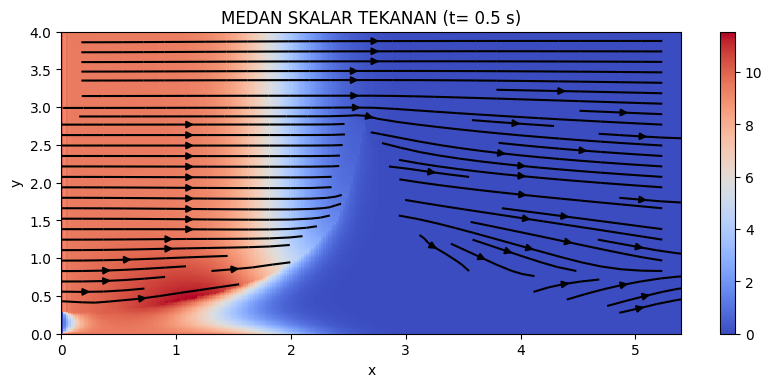

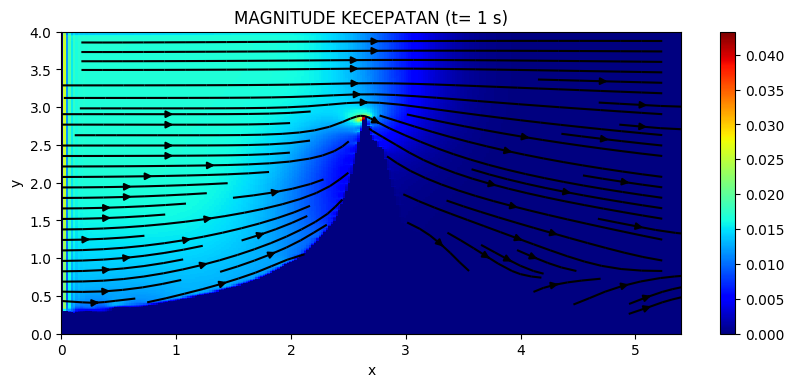

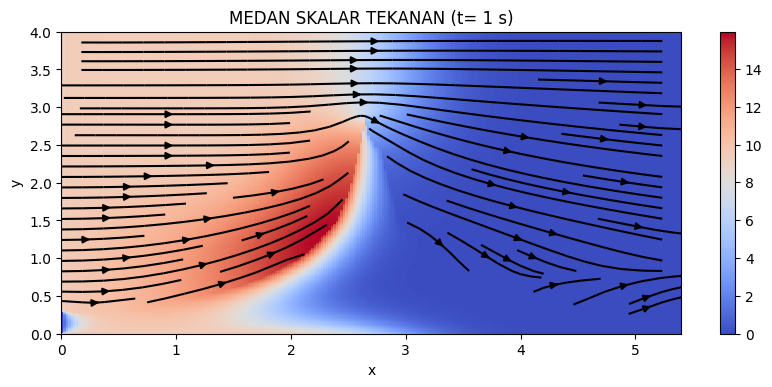

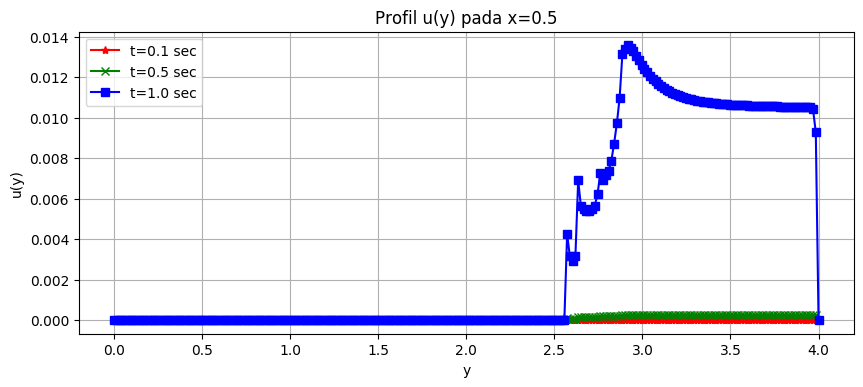

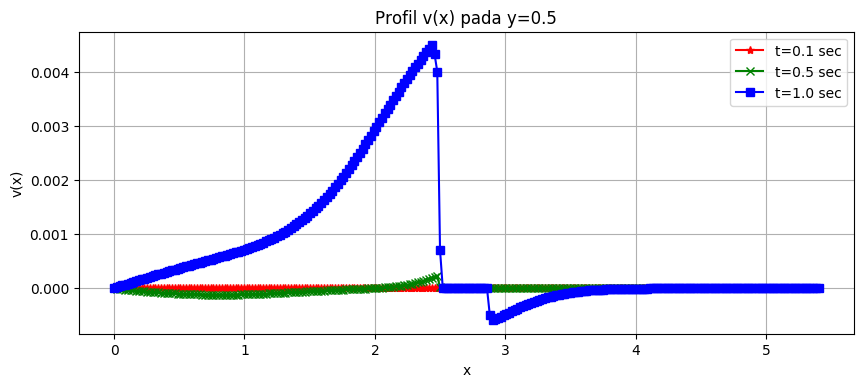

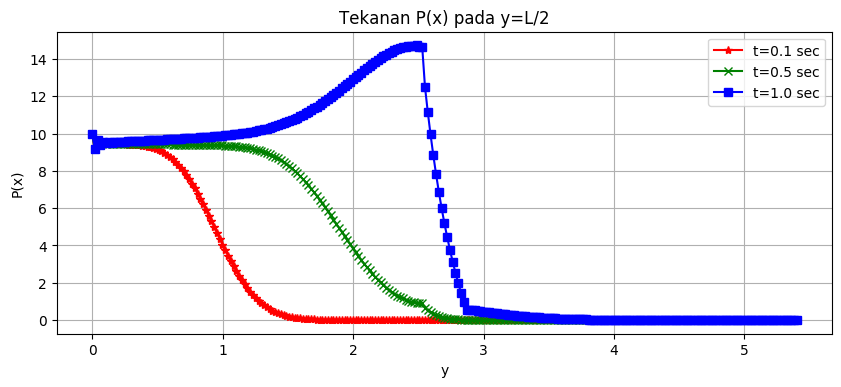

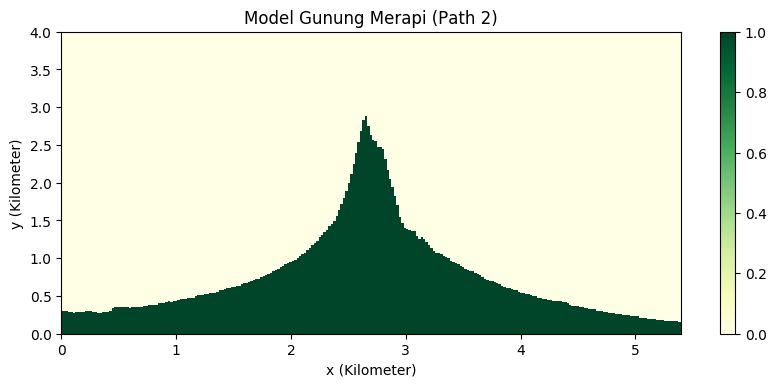

In [8]:
"""
D E P A R T E M E N   F I S I K A - U G M
Bulaksumur Yogyakarta, Kabupaten Sleman 55281
-------------------------------------------------------------------------------
Author  : Reizkian Yesaya .R
Email   : reizkianyesaya@gmail.com
Program : FD_GeoSclice_A
Created : Sat Jun  8 00:19:38 2019
"""

import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
#Parameter Numerik:
Lx=5.4 # kilometer
Ly=4  # kilometer
sizex = 10
sizey = 4
ratio = sizey/sizex
Nx=256
Ny=256
dx = Lx/(Nx-1)
dy = Ly/(Ny-1)
dt = 0.0001

#Parameter Fisis:
#(!! dicoba dahulu untuk N_time=50, untuk memastikan program!!)
N_time = 50      # untuk menghitung 1 detik 
                 # N_time*dt = (1000)*(0.001) = 1 detik   
N_ptime = 20     # step-time untuk tekanan
vis = 0.1        # viskositas kinematik
rho = 1          # massa jenis
nu = vis/rho

#Deklarasi Variabel Ruang:
x=np.linspace(0,Lx,Nx)
y=np.linspace(0,Ly,Ny)
x,y=np.meshgrid(x,y)

#Profile data time
profile1 = N_time/3
profile2 = N_time*2/3
profile3 = N_time

u = np.zeros([Nx,Ny])     #kecepatan arah-x
v = np.zeros([Nx,Ny])     #kecepatan arah-y
P = np.zeros([Nx,Ny])     #Tekanan
b = np.zeros([Nx,Ny])     #source Tekanan

P[0,:] = 10     #Induksi Tekanan pada sebelah kiri
Gx = 0
Gy = 0

# M E R A P I   O B J E C T (definition)
Mydataset = pd.read_csv('gdrive/My Drive/NVSCode/path4.csv') #raw elevation data
Elevation_raw = Mydataset.iloc[:,3].values/1000
Elevation = np.zeros([Nx])
lenElevation = len(Elevation)
object_array = np.zeros([Nx,Ny])

def AverageStep(InputData,OutputData):
    InputData_calc = InputData.copy()
    OutputData_calc = OutputData.copy()
    
    na = len(InputData_calc)
    nb = len(OutputData_calc)
    step = int(na/nb)

    for i in range(0,na-step,step):
        contain=0
        for j in range(step):
            contain = contain + InputData_calc[i+j]
        average = contain/step
        pointer = int(i/step+1)
        OutputData_calc[pointer-1]=average
    
    return OutputData_calc

Elevation = AverageStep(Elevation_raw,Elevation)

for i in range(lenElevation):
    elevation_yn = int(Ny*Elevation[i]/Ly)
    for j in range(0,elevation_yn):
        object_array[i,j]=1
        

# Boundary Condition (object)
def VelocityBoundary_Object():
    for i in range(Nx):
        for j in range(Ny):
            if object_array[i,j] == 1:
                u[i,j] = 0
                v[i,j] = 0
            
def PressureBoundary_Object():
    for i in range(Nx):
        for j in range(Ny):
            wall_x=object_array[i,j]-object_array[i-1,j]
            wall_y=object_array[i,j]-object_array[i,j-1]
            if wall_x > 0:
                P[i,j]=P[i-1,j]
            if wall_x < 0:
                P[i-1,j]=P[i,j]
            if wall_y > 0:
                P[i,j]=P[i,j-1]
            if wall_y < 0:
                P[i,j-1]=P[i,j]
                   
# Boundary Condition (channel)
def VelocityBoundary_Channel():    
    u[:,-1] = 0  #u(x,y=1) = 0
    u[:,0]  = 0  #u(x,y=0) = 0
    u[0,:]  = 0  #u(x=0,y) = 0
    u[-1,:] = 0  #u(x=1,y) = 0
        
    v[:,-1] = 0  #u(x,y=1) = 0
    v[:,0]  = 0  #u(x,y=0) = 0
    v[0,:]  = 0  #u(x=0,y) = 0
    v[-1,:] = 0  #u(x=1,y) = 0
def PressureBoundary_Channel():
    P[:,0]  = P[:,1]    # dP/dy = 0  pada y = 0
    P[:,-1] = P[:,-2]   # dP/dy = 0  pada y = 1

VelocityBoundary_Object()
PressureBoundary_Object()
VelocityBoundary_Channel()
PressureBoundary_Channel()
# Mulai Iterasi
#------------------------------------------------------------------------------
for n in range(N_time+1):
    percentage = n*100/N_time
    print("RUNNIG =",percentage, "%")
    
    #if percentage == 72:
        #break
    
    for i in range (1,Nx-1):
        for j in range (1,Ny-1):
            u_xcd = ( u[i+1,j] - u[i-1,j] ) / 2 / dx  # du/dx central difference 
            u_ycd = ( u[i,j+1] - u[i,j-1] ) / 2 / dx  # du/dy central difference
            v_xcd = ( v[i+1,j] - v[i-1,j] ) / 2 / dx  # dv/dx central difference
            v_ycd = ( v[i,j+1] - v[i,j-1] ) / 2 / dx  # dv/dy central difference
            b[i,j] = rho*(u_xcd+v_ycd)/dt - rho*(u_xcd**2+v_ycd**2+2*u_ycd*v_xcd)
    
    for t in range(N_ptime):
        for i in range (1,Nx-1):
            for j in range (1,Ny-1):
                P_xx = (P[i+1,j] + P[i-1,j]) * (dy**2) # turunan P dua kali x
                P_yy = (P[i,j+1] + P[i,j-1]) * (dx**2) # turunan P dua kali y
                P[i,j] = (P_xx + P_yy - b[i,j]*(dx**2)*(dy**2)) / (dx**2+dy**2) /2
        #Syarat Batas Tekanan
        PressureBoundary_Channel()
        PressureBoundary_Object()
        
    un = u.copy()
    vn = v.copy()   
    for i in range(1,Nx-1):
        for j in range(1,Ny-1):
            u_x = (un[i,j] - un[i-1,j]) / dx # u turunan x
            u_y = (un[i,j] - un[i,j-1]) / dy # u turunan y   
            v_x = (vn[i,j] - vn[i-1,j]) / dx # v turunan x
            v_y = (vn[i,j] - vn[i,j-1]) / dy # v turunan y           
            
            P_x = (P[i+1,j] - P[i-1,j]) / 2 / dx # P turunan x
            P_y = (P[i,j+1] - P[i,j-1]) / 2 / dy # P turunan y
            
            u_xx = (un[i+1,j] - 2*u[i,j] + un[i-1,j]) / (dx**2) # u turunan x, dua kali
            u_yy = (un[i,j+1] - 2*u[i,j] + un[i,j-1]) / (dx**2) # u turunan y, dua kali
            v_xx = (vn[i+1,j] - 2*v[i,j] + vn[i-1,j]) / (dy**2) # v turunan x, dua kali
            v_yy = (vn[i,j+1] - 2*v[i,j] + vn[i,j-1]) / (dy**2) # v turunan y, dua kali
            
            u[i,j] = un[i,j] + dt*(-u[i,j]*u_x - v[i,j]*u_y - (P_x/rho) + vis*(u_xx+u_yy) + Gx)
            v[i,j] = vn[i,j] + dt*(-u[i,j]*v_x - v[i,j]*v_y - (P_y/rho) + vis*(v_xx+v_yy) + Gy)
            
    VelocityBoundary_Channel()
    VelocityBoundary_Object()
    
    
    # D A T A   E X T R A C T I O N   C O N D I O T I O N
    #-----------------------------------------------------------------------------
    # ketika iterasi berlangsung, data disimpan pada variabel2 dibawah ini 
    # kondisi extract diungkapkan dalam syarat "if" 
    # variabel di TRANSPOSE agar susunan data sesuai dengan spesifikasi matplotlib
    # transpose hanya untuk kepentingan plotting, bukan untuk manipulasi matematis
    #-----------------------------------------------------------------------------
    if n == int(profile1): #profile 1 (menampung data ketika t=0.0016)
        u1 = u.copy()
        v1 = v.copy()
        P1 = P.copy()
        P_sx1 = P1[0:Nx-1,int(Ny/2)]     # tekanan P(x) (y=L/2 t=0.1)
        u1_central = u1[int(Nx/2),0:Ny]  # kecepatan u sumbu simetri-y
        v1_central = v1[0:Nx,int(Ny/2)]  # kecepatan x sumbu simetri-x
        u1 = u1.T
        v1 = v1.T
        P1 = P1.T
        VelocityMagnitude1 = np.sqrt(u1**2+v1**2)
        print("---------------> Profile 1 saved")
    if n == int(profile2): #profile 2 (menampung data ketika t=0.003)
        u2 = u.copy()
        v2 = v.copy()
        P2 = P.copy()
        P_sx2 = P2[0:Nx-1,int(Ny/2)]    # tekanan P(x) (y=L/2 t=0.003)
        u2_central = u2[int(Nx/2),0:Ny] # kecepatan u sumbu simetri-y
        v2_central = v2[0:Nx,int(Ny/2)] # kecepatan v sumbu simetri-x
        u2 = u2.T
        v2 = v2.T
        P2 = P2.T
        VelocityMagnitude2 = np.sqrt(u2**2+v2**2)
        print("---------------> Profile 2 saved")
    if n == int(profile3): #profile 3 (menampung data ketika t=0.005)
        u3 = u.copy()
        v3 = v.copy()
        P3 = P.copy()
        P_sx3 = P3[0:Nx-1,int(Ny/2)]     # tekanan P(x) (y=L/2 t=1)
        u3_central = u3[int(Nx/2),0:Ny]  # kecepatan u sumbu simetri-y
        v3_central = v3[0:Nx,int(Ny/2)]  # kecepatan v sumbu simetri-x
        u3 = u3.T
        v3 = v3.T
        P3 = P3.T
        VelocityMagnitude3 = np.sqrt(u3**2+v3**2)
        print("---------------> Profile 3 saved")
   
#------------------------------------------------------------------------------
#Selesai Iterasi
#------------------------------------------------------------------------------

#CODE UNTUK PLOT 
total_time = N_time*dt
colorMagnitude = "jet"
colorPressure = "coolwarm"

y_plot = np.linspace(0,Ly,Ny)
x_plot = np.linspace(0,Lx,Nx)

yp_plot = np.linspace(0,Ly,Ny-1)
xp_plot = np.linspace(0,Lx,Nx-1)

# Profile 1 (t=0.1)
#------------------------------------------------------
fig1 =  plt.figure(figsize=(sizex,sizey), dpi=100)
plt.pcolor(x,y,VelocityMagnitude1, cmap=colorMagnitude)
plt.colorbar()
plt.streamplot(x,y,u1,v1, color='k')
plt.xlabel("x")
plt.ylabel("y")
plt.title("MAGNITUDE KECEPATAN (t= 0.1 s)")
plt.show()

fig2 =  plt.figure(figsize=(sizex,sizey), dpi=100)
plt.pcolor(x,y,P1, cmap=colorPressure)
plt.colorbar()
plt.streamplot(x,y,u1,v1, color='k')
plt.xlabel("x")
plt.ylabel("y")
plt.title("MEDAN SKALAR TEKANAN (t= 0.1 s)")
plt.show()

# Profile 2 (t=0.5)
#------------------------------------------------------
fig3 =  plt.figure(figsize=(sizex,sizey), dpi=100)
plt.pcolor(x,y,VelocityMagnitude2, cmap=colorMagnitude)
plt.colorbar()
plt.streamplot(x,y,u2,v2, color='k')
plt.xlabel("x")
plt.ylabel("y")
plt.title("MAGNITUDE KECEPATAN (t= 0.5 s)")
plt.show()

fig4 =  plt.figure(figsize=(sizex,sizey), dpi=100)
plt.pcolor(x,y,P2, cmap=colorPressure)
plt.colorbar()
plt.streamplot(x,y,u2,v2, color='k')
plt.xlabel("x")
plt.ylabel("y")
plt.title("MEDAN SKALAR TEKANAN (t= 0.5 s)")
plt.show()

# Profile 3 (t=1.0)
#------------------------------------------------------
fig5 =  plt.figure(figsize=(sizex,sizey), dpi=100)
plt.pcolor(x,y,VelocityMagnitude3, cmap=colorMagnitude)
plt.colorbar()
plt.streamplot(x,y,u3,v3, color='k')
plt.xlabel("x")
plt.ylabel("y")
plt.title("MAGNITUDE KECEPATAN (t= 1 s)")
plt.show()

fig6 =  plt.figure(figsize=(sizex,sizey), dpi=100)
plt.pcolor(x,y,P3, cmap=colorPressure)
plt.colorbar()
plt.streamplot(x,y,u3,v3, color='k')
plt.xlabel("x")
plt.ylabel("y")
plt.title("MEDAN SKALAR TEKANAN (t= 1 s)")
plt.show()

# Velocity Center Plot
#------------------------------------------------------
fig7 =  plt.figure(figsize=(sizex,sizey), dpi=100) # u profile
plt.plot(y_plot,u1_central,'r*-', label='t=0.1 sec')
plt.plot(y_plot,u2_central,'gx-', label='t=0.5 sec')
plt.plot(y_plot,u3_central,'bs-', label='t=1.0 sec')
plt.grid()
plt.xlabel('y')
plt.ylabel('u(y)')
plt.title('Profil u(y) pada x=0.5')
plt.grid(True)
plt.legend()
plt.show()

fig8 =  plt.figure(figsize=(sizex,sizey), dpi=100) # v profile
plt.plot(x_plot,v1_central,'r*-', label='t=0.1 sec')
plt.plot(x_plot,v2_central,'gx-', label='t=0.5 sec')
plt.plot(x_plot,v3_central,'bs-', label='t=1.0 sec')
plt.grid()
plt.xlabel('x')
plt.ylabel('v(x)')
plt.title('Profil v(x) pada y=0.5')
plt.grid(True)
plt.legend()
plt.show()

# Pressure Simetry
#------------------------------------------------------
fig9 =  plt.figure(figsize=(sizex,sizey), dpi=100) #left profile
plt.plot(xp_plot,P_sx1,'r*-', label='t=0.1 sec')
plt.plot(xp_plot,P_sx2,'gx-', label='t=0.5 sec')
plt.plot(xp_plot,P_sx3,'bs-', label='t=1.0 sec')
plt.grid()
plt.xlabel('y')
plt.ylabel('P(x)')
plt.title('Tekanan P(x) pada y=L/2')
plt.grid(True)
plt.legend()
plt.show()

# Scalar E
#------------------------------------------------------
fig10 =  plt.figure(figsize=(sizex,sizey), dpi=100)
plt.pcolor(x,y,object_array.T, cmap="YlGn")
plt.colorbar()
plt.xlabel("x (Kilometer)")
plt.ylabel("y (Kilometer)")
plt.title("Model Gunung Merapi (Path 2)")
plt.show()